In [1]:
import numpy as np, plottools as pl, healpy as hp, binning as bn, tools_qrec, curvedsky as cs, pickle, local, tools_cmb, tools_cib, warnings
from matplotlib.pyplot import *
from scipy.signal import savgol_filter
warnings.filterwarnings("ignore")

In [2]:
def binned_spec(mb,aobj,qobj,xobj,cn):
    mkk = bn.binning(aobj.ckk,mb)*np.pi/180.
    mcb, vcb = {}, {}
    for q in ['TB','EB','BB']:
        if cn==2:  kk = aobj.ckk
        if cn==3:  kk = np.loadtxt(xobj.fmcl[q]).T[4]
        al = (np.loadtxt(qobj['ilens'].f[q].al)).T[1]
        vl = np.sqrt(al*kk)/np.sqrt(qobj['ilens'].l+1e-30)
        mcb[q], vcb[q], __ = bn.binned_spec(mb,xobj.fcli[q],cn=cn,opt=True,vl=vl,doreal=False)
        if cn==3:  mcb[q] -= mkk
    return mcb, vcb

In [3]:
aobj = local.init_analysis(freq='smica',dtype='full',wind='LG40',fltr='cinv',biref=1.)
#Aobj = local.init_analysis(freq='smica',dtype='full',wind='LG60',biref=.5)

In [4]:
qobj = tools_qrec.init_quad(aobj.snmax,ids=local.ids,rlz=aobj.rlz,stag=aobj.stag,qtypes=['ilens'],rlmin=100,rlmax=2048)
#Qobj = tools_qrec.init_quad(Aobj.snmax,ids=local.ids,rlz=Aobj.rlz,stag=Aobj.stag,qtypes=['ilens'],rlmin=100,rlmax=2048)

In [5]:
iobj = tools_cib.init_cib(wind='G40')

In [9]:
xobj = tools_qrec.cross(qobj['ilens'],iobj,ids=local.ids[:aobj.snmax+1])
#Xobj = tools_qrec.cross(Qobj['ilens'],iobj)

#### lens x input

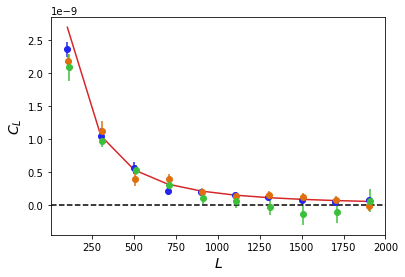

In [10]:
mb  = bn.multipole_binning(10,lmin=2,lmax=2000)
mkk = bn.binning(aobj.ckk,mb)*np.pi/180.
mcb0, vcb0 = binned_spec(mb,aobj,qobj,xobj,2)
#mcb1, vcb1 = binned_spec(mb,Aobj,Qobj,Xobj,2)
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax)
for i, (q, fac) in enumerate(zip(['TB','EB','BB'],(1,1,1))):
    errorbar(mb.bc+i*5,fac*mcb0[q],yerr=vcb0[q]/10,fmt='o')
    #errorbar(mb.bc+i*5,mcb1[q],yerr=vcb1[q],fmt='o')
plot(mb.bc,mkk)
axhline(0,color='k',ls='--')

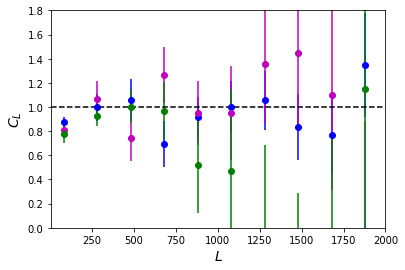

In [12]:
mkk = bn.binning(aobj.ckk,mb)*np.pi/180.
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=.0,ymax=1.8)
for q, c in zip(['TB','EB','BB'],['b','m','g']):
    errorbar(mb.bc-20,mcb0[q]/mkk,yerr=vcb0[q]/mkk/10.,fmt='o',color=c)
    #errorbar(mb.bc+20,mcb1[q]/mkk*2.,yerr=vcb1[q]*2./mkk/10.,fmt='^',color=c,alpha=0.3)
axhline(1,color='k',ls='--')

#### ilens x lens

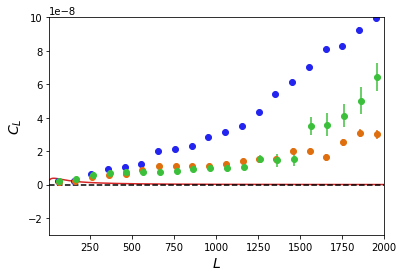

In [14]:
mb = bn.multipole_binning(20,lmin=8,lmax=2000)
mcb0, vcb0 = binned_spec(mb,aobj,qobj,xobj,3)
#mcb1, vcb1 = binned_spec(mb,Aobj,Qobj,Xobj,3)
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=-3e-8,ymax=1e-7)
for i, q in enumerate(['TB','EB','BB']):
    errorbar(mb.bc+i*5,mcb0[q],yerr=vcb0[q]/10.,fmt='o')
    #errorbar(mb.bc+i*5,mcb1[q]*2,yerr=vcb1[q]*2/10.,fmt='o')
plot(aobj.l,aobj.ckk*np.pi/180)
axhline(0,color='k',ls='--')

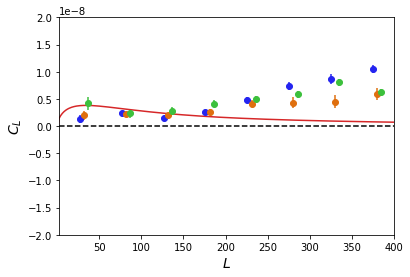

In [15]:
mb = bn.multipole_binning(8,lmin=2,lmax=400)
mcb0, vcb0 = binned_spec(mb,aobj,qobj,xobj,3)
#mcb1, vcb1 = binned_spec(mb,Aobj,Qobj,Xobj,3)
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=-2e-8,ymax=2e-8)
for i, q in enumerate(['TB','EB','BB']):
    errorbar(mb.bc+i*5,mcb0[q],yerr=vcb0[q]/10.,fmt='o')
    #errorbar(mb.bc+i*5,mcb1[q]*2,yerr=vcb1[q]*2/10.,fmt='o')
plot(aobj.l,aobj.ckk*np.pi/180)
axhline(0,color='k',ls='--')